## Evaluation of the progress towards SDG goal (No.7 )


In [1]:
%run helper.py

In [4]:
# Data Preparation
edge_df = pd.read_csv('Dataset/sdg_edges.csv')

G = nx.from_pandas_edgelist(edge_df, 'node1', 'node2')

# Define group colors (each group gets a different color)
group_colors = {
    1: "#E5233D",  # Grp 1: Red
    2: "#4CA146",  # Grp 2: Green
    3: "#A31C44",  # Grp 3: Purple
    4: "#FBC412",  # Grp 4: Yellow
    5: "#1F97D4",  # Grp 5: Blue
    6: "#59BA48"   # Grp 6: Light Green
}

# Define node groups (modify as needed)
node_groups = {
    1: 1, 2: 1, 10: 1,   # Grp 1
    3: 2, 6: 2, 7: 2,    # Grp 2
    8: 3, 9: 3, 16: 3,   # Grp 3
    4: 4, 5: 4,          # Grp 4
    11: 5, 12: 5, 17: 5, # Grp 5
    13: 6, 14: 6, 15: 6  # Grp 6
}

# Assign colors based on group
node_colors = [group_colors[node_groups[node]] for node in G.nodes()]

print(node_colors)

['#E5233D', '#E5233D', '#E5233D', '#4CA146', '#59BA48', '#FBC412', '#A31C44', '#FBC412', '#4CA146', '#4CA146', '#A31C44', '#1F97D4', '#59BA48', '#1F97D4', '#59BA48', '#A31C44', '#1F97D4']


### Radial Layout

node_sizes:  [1200.0, 1200.0, 1200.0, 825.0, 981.25, 731.25, 981.25, 1481.25, 981.25, 981.25, 825.0, 1200.0, 2700.0, 825.0, 981.25, 1200.0, 731.25]


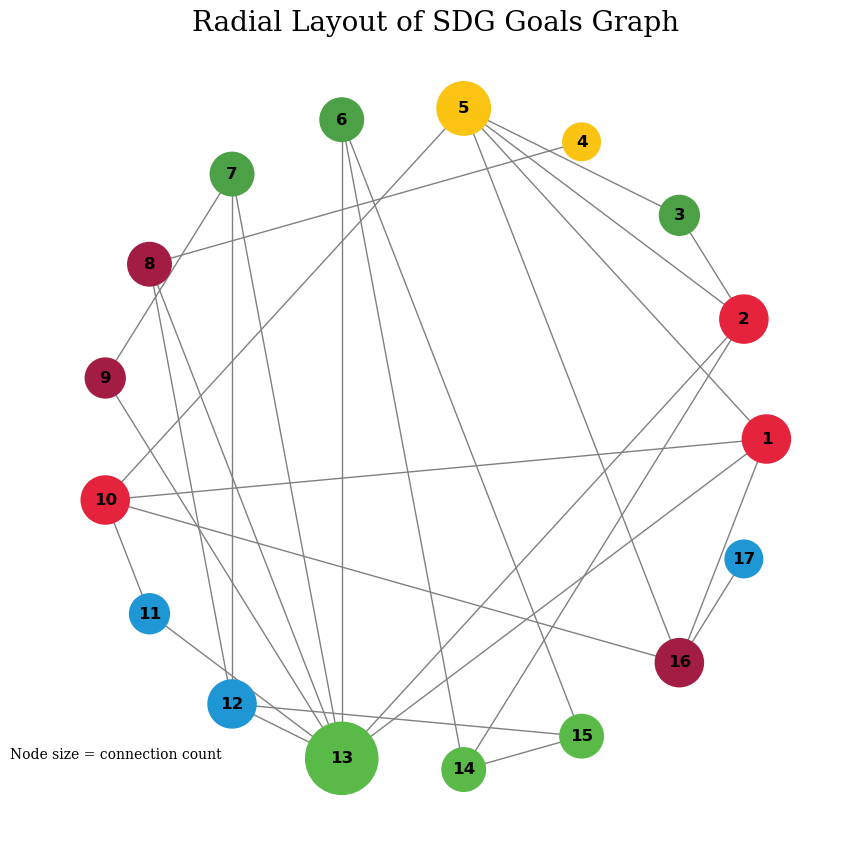

In [5]:
# Generate circular layout
nodes_sorted = sorted(G.nodes())
angle_step = 2 * np.pi / len(nodes_sorted)
node_positions = {node: (np.cos(i * angle_step), np.sin(i * angle_step)) for i, node in enumerate(nodes_sorted)}

degree_dict = dict(G.degree())

# Normalize the degree values to scale the node sizes
max_degree = max(degree_dict.values())
node_sizes = [700 + (degree_dict[node] / max_degree)**2 * 2000 for node in G.nodes()]
print("node_sizes: ", node_sizes)

# Update the draw function to use variable node sizes instead of fixed 700
plt.figure(figsize=(8, 8))
nx.draw(
    G, node_positions, with_labels=True, node_size=node_sizes, 
    node_color=node_colors, edge_color='gray', font_size=12, font_weight='bold'
)

# Add a custom legend for node sizes
plt.figtext(0.1, 0.1, "Node size = connection count", ha="center")

# Show the plot
plt.title("Radial Layout of SDG Goals Graph")
plt.show()

### Force directed graph

#### Kamada-Kawai layouts with diff seeds

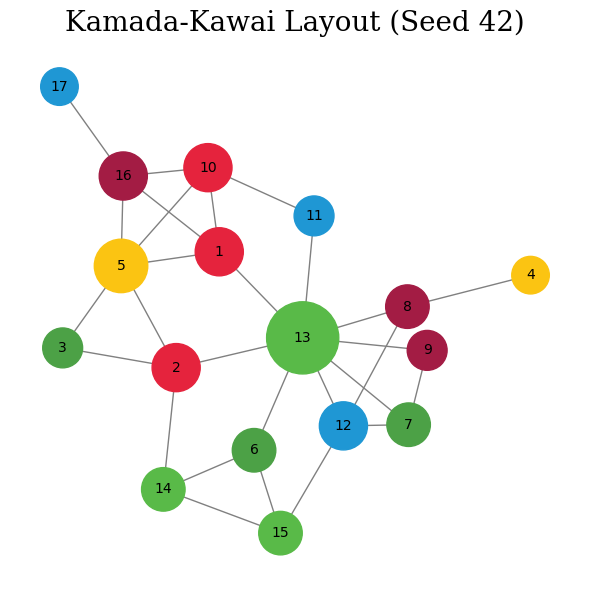

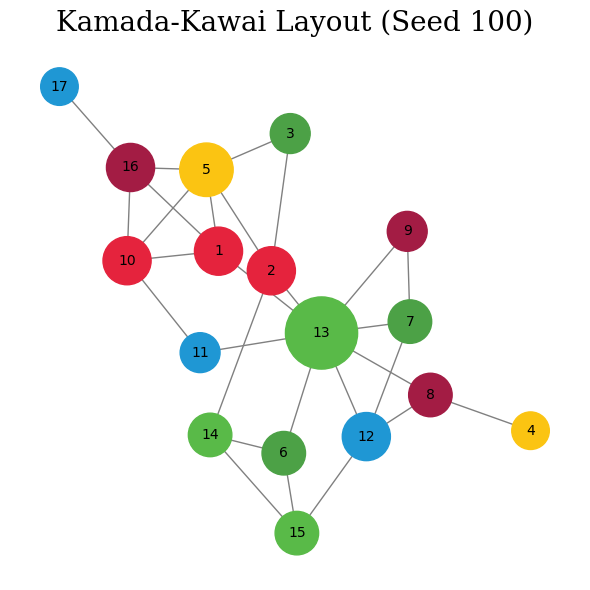

In [6]:
for seed in [42, 100]:
    np.random.seed(seed)
    initial_pos = nx.random_layout(G, seed=seed) 
    pos_kk = nx.kamada_kawai_layout(G, pos=initial_pos)
    
    # Assign node colors based on groups
    node_colors = [group_colors[node_groups[node]] for node in G.nodes()]

    fig, ax = plt.subplots(figsize=(6,6))
    nx.draw_networkx(
        G, pos=pos_kk, ax=ax, node_color=node_colors, edge_color='gray', 
        with_labels=True, font_size=10, node_size=node_sizes,
    )
    ax.set_axis_off()
    plt.title(f"Kamada-Kawai Layout (Seed {seed})")
    plt.tight_layout()
    plt.show()

#### Fruchterman-Reingold layouts with different seeds

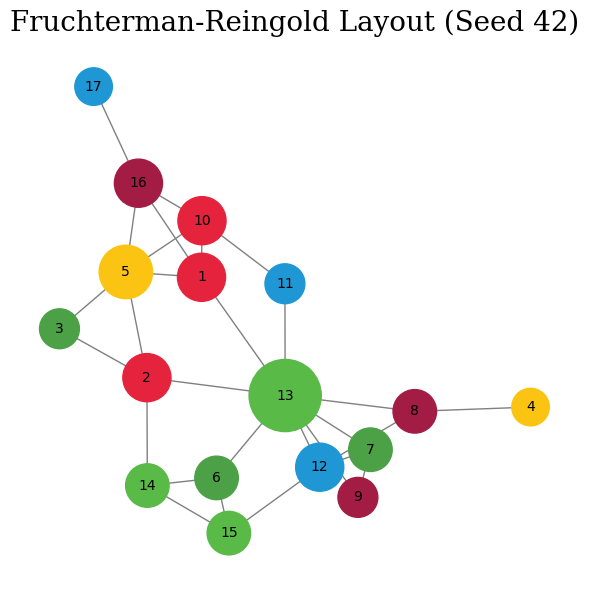

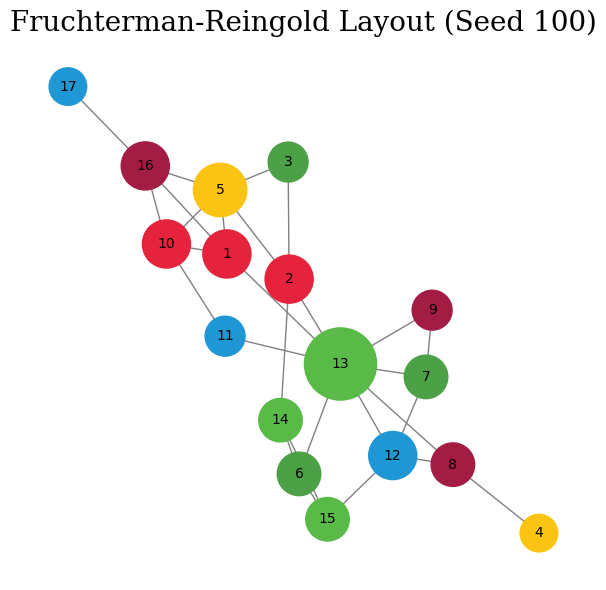

In [7]:
for seed in [42, 100]:
    np.random.seed(seed)
    initial_pos = nx.random_layout(G, seed=seed)  # Random starting positions
    pos_fr = nx.fruchterman_reingold_layout(G, pos=initial_pos)

    # Assign node colors based on groups
    node_colors = [group_colors[node_groups[node]] for node in G.nodes()]

    fig, ax = plt.subplots(figsize=(6,6))
    nx.draw_networkx(
        G, pos=pos_fr, ax=ax, node_color=node_colors, edge_color='gray', 
        with_labels=True, font_size=10, node_size=node_sizes,
    )
    ax.set_axis_off()
    plt.title(f"Fruchterman-Reingold Layout (Seed {seed})")
    plt.tight_layout()
    plt.show()
